<a href="https://colab.research.google.com/github/Rits396/Self_Learning_Comment_Analysis/blob/main/MITIGATING_BIASES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A. Balanced Data Sampling**

This code demonstrates how balancing techniques like SMOTE can help address the problem of class imbalance:

Initial Model (imbalanced data) shows poor performance on the minority class (class 1).
Updated Model (balanced with SMOTE) improves performance, particularly in recall and F1 score, for the minority class.

**Step 1: Import Libraries**

imports essential libraries:

Numpy and Pandas: For data manipulation.
Matplotlib and Seaborn: For visualizing data and model results.
Scikit-learn tools: For building a classification model, splitting data, and evaluating model performance.
Imbalanced-learn (imblearn): Specifically for SMOTE, which will help us balance our dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For over-sampling
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling


**Step 2: Create a Synthetic Imbalanced Dataset**
Here:

We set a seed (np.random.seed(42)) to ensure results are reproducible.
We create a synthetic dataset with 1000 samples and two features. The label column represents our target variable, with 90% of samples belonging to class 0 and only 10% to class 1, creating a highly imbalanced dataset.

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic imbalanced dataset
n_samples = 1000
data = {
    'feature_1': np.random.rand(n_samples),
    'feature_2': np.random.rand(n_samples),
    'label': np.random.choice([0, 1], n_samples, p=[0.9, 0.1])  # 90% of class 0 and 10% of class 1
}
df = pd.DataFrame(data)


**Step 3: Split the Dataset into Training and Test Sets**
The data is split into training and test sets, with 20% of data reserved for testing.
This split helps us evaluate the model’s performance on unseen data.

In [ ]:
# Split the dataset into training and test sets
X = df[['feature_1', 'feature_2']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Train an Initial Model on the Imbalanced Data**
A Random Forest Classifier is trained on the imbalanced dataset. Since the classes are imbalanced, the model might tend to predict the majority class (0) more often, resulting in poor performance on the minority class (1).

In [ ]:
# Train the initial model on the imbalanced dataset
model_initial = RandomForestClassifier(random_state=42)
model_initial.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Step 5: Evaluate Initial Model Performance**
Predictions are made on the test set, and we evaluate performance using classification metrics like accuracy, precision, recall, and F1 score.
These metrics are stored in initial_report and accuracy_initial. We expect the metrics for class 1 (minority class) to be relatively low.


In [ ]:
# Evaluate initial model performance
y_pred_initial = model_initial.predict(X_test)
initial_report = classification_report(y_test, y_pred_initial, output_dict=True)
accuracy_initial = accuracy_score(y_test, y_pred_initial)


**Step 6: Apply SMOTE for Balanced Sampling**
We apply SMOTE to the training data, which over-samples the minority class by generating synthetic examples. This makes the dataset balanced for the model.
The newly balanced data is stored in X_train_balanced and y_train_balanced.

In [ ]:
# Apply balanced sampling (over-sampling with SMOTE)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


**Step 7: Train an Updated Model on the Balanced Data**
We train a new model on the balanced dataset created by SMOTE. By training on this balanced data, the model is better equipped to recognize patterns in both classes.



In [ ]:
# Train the updated model on the balanced dataset
model_updated = RandomForestClassifier(random_state=42)
model_updated.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

**Step 8: Evaluate Updated Model Performance**
After training, we test the updated model on the same test set and evaluate its performance.
Since this model was trained on balanced data, it is expected to have improved performance on the minority class (1).

In [ ]:
# Evaluate updated model performance
y_pred_updated = model_updated.predict(X_test)
updated_report = classification_report(y_test, y_pred_updated, output_dict=True)
accuracy_updated = accuracy_score(y_test, y_pred_updated)


**Step 9: Visualize the Results**
We visualize results to compare the initial model (trained on imbalanced data) with the updated model (trained on balanced data).

**(a) Model Performance Metrics (Accuracy, Precision, Recall, F1 Score)**
We create a DataFrame (results_df) that holds accuracy, precision, recall, and F1 scores for both models. This will help us visualize model performance improvements.



In [ ]:
# Model performance comparison
labels = ['Initial Model', 'Updated Model']
accuracies = [accuracy_initial, accuracy_updated]
precision_A = [initial_report['1']['precision'], updated_report['1']['precision']]
recall_A = [initial_report['1']['recall'], updated_report['1']['recall']]
f1_A = [initial_report['1']['f1-score'], updated_report['1']['f1-score']]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': labels,
    'Accuracy': accuracies,
    'Precision': precision_A,
    'Recall': recall_A,
    'F1 Score': f1_A
})


**(b) Bar Plot of Performance Metrics**
This bar plot compares the accuracy, precision, recall, and F1 scores of the initial and updated models. We expect the updated model to show improved precision, recall, and F1 score, particularly for the minority class.

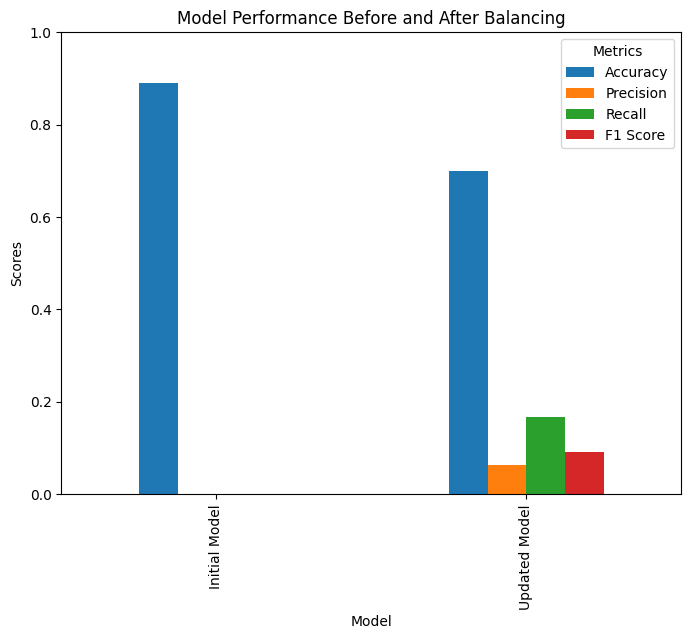

In [ ]:
# Plotting performance metrics
fig, ax = plt.subplots(figsize=(8, 6))

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=ax)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Balancing')
ax.legend(title='Metrics')
ax.set_ylim(0, 1)

plt.show()


**(c) Confusion Matrix Visualization**
Heatmaps of confusion matrices allow us to see the distribution of predictions across classes for both models.
The initial model will likely have more false negatives for class 1 due to the class imbalance, while the updated model should have a more balanced confusion matrix.


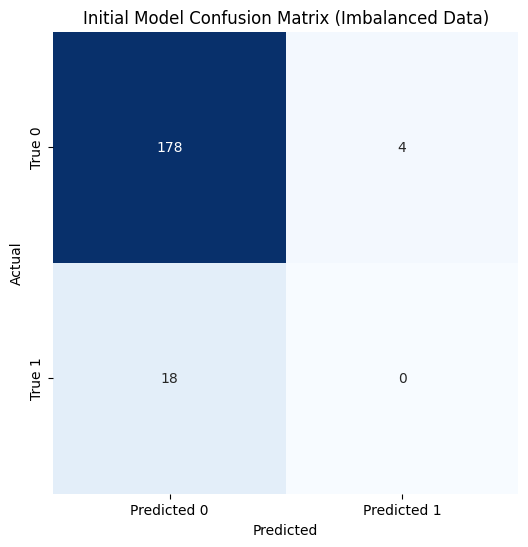

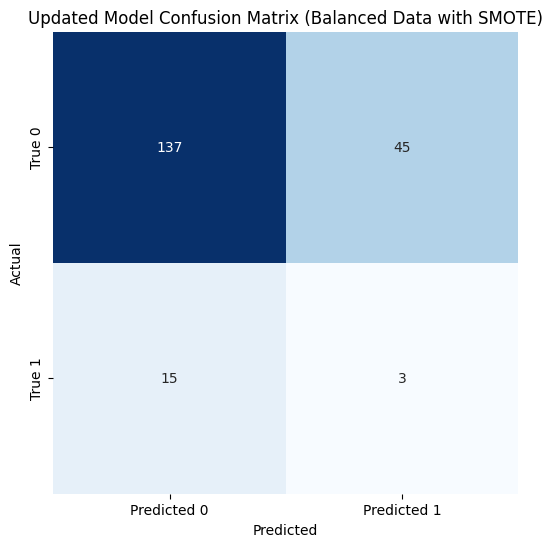

In [ ]:
cm_initial = confusion_matrix(y_test, y_pred_initial)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_initial, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Initial Model Confusion Matrix (Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Updated Model Confusion Matrix
cm_updated = confusion_matrix(y_test, y_pred_updated)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_updated, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Updated Model Confusion Matrix (Balanced Data with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **B. Consensus based labeling**

**Step 1: Import Libraries and Create Synthetic Data**

Here we import the necessary libraries:

pandas for data manipulation.
numpy for generating random numbers.
mode from scipy.stats to calculate the consensus (or majority) label.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode


**Step 2: Create a Function to Generate Synthetic Data**

Setting a random seed with np.random.seed(42) ensures that each time we run this cell, we get the same random numbers, which is useful for reproducibility.
Generating Data:
feature column: Random values between 0 and 1.
label_annotator_1, label_annotator_2, and label_annotator_3: These columns represent labels from three different annotators who may assign either 0 or 1 as a label. The labels are chosen randomly for each annotator and sample.
Returning a DataFrame: This function returns a DataFrame containing the synthetic dataset.

In [ ]:
def create_synthetic_data(num_samples=10):
    # Create a dataset with features and multiple labels from different annotators
    np.random.seed(42)  # Ensures reproducibility
    data = {
        'feature': np.random.rand(num_samples),
        'label_annotator_1': np.random.choice([0, 1], size=num_samples),
        'label_annotator_2': np.random.choice([0, 1], size=num_samples),
        'label_annotator_3': np.random.choice([0, 1], size=num_samples)
    }
    return pd.DataFrame(data)


Synthetic Data with Individual Annotations:
     feature  label_annotator_1  label_annotator_2  label_annotator_3
0   0.374540                  0                  0                  0
1   0.950714                  0                  0                  1
2   0.731994                  1                  0                  0
3   0.598658                  1                  0                  1
4   0.156019                  1                  0                  0
5   0.155995                  1                  1                  0
6   0.058084                  1                  1                  1
7   0.866176                  0                  0                  0
8   0.601115                  1                  1                  1
9   0.708073                  1                  1                  1
10  0.020584                  0                  1                  1
11  0.969910                  1                  1                  1
12  0.832443                  0               

This displays the dataset with individual labels from each annotator.

In [ ]:
synthetic_data = create_synthetic_data(num_samples=20)
print("Synthetic Data with Individual Annotations:")
print(synthetic_data)

Synthetic Data with Individual Annotations:
     feature  label_annotator_1  label_annotator_2  label_annotator_3
0   0.374540                  0                  0                  0
1   0.950714                  0                  0                  1
2   0.731994                  1                  0                  0
3   0.598658                  1                  0                  1
4   0.156019                  1                  0                  0
5   0.155995                  1                  1                  0
6   0.058084                  1                  1                  1
7   0.866176                  0                  0                  0
8   0.601115                  1                  1                  1
9   0.708073                  1                  1                  1
10  0.020584                  0                  1                  1
11  0.969910                  1                  1                  1
12  0.832443                  0               

**Step 3: Implement Consensus-Based Labeling**

Selecting Columns for Voting:
The function takes a DataFrame with multiple annotator labels.
data[['label_annotator_1', 'label_annotator_2', 'label_annotator_3']] selects the label columns for each annotator.
Applying Majority Voting:
mode(axis=1)[0] calculates the most common label for each row (sample) across the annotators.
axis=1 tells mode to calculate along rows, so it finds the most frequent label per sample.
The [0] extracts the mode from the result, assigning it as the final label.
Creating final_label:
A new column final_label is added to store the consensus-based label for each sample.

In [ ]:
def consensus_labeling(data):
    # Use majority voting to determine the final label
    data['final_label'] = data[['label_annotator_1', 'label_annotator_2', 'label_annotator_3']].mode(axis=1)[0]
    return data


This shows the data with the additional final_label column, representing the consensus-based label.

In [ ]:
labeled_data = consensus_labeling(synthetic_data)
print("\nData with Consensus-Based Final Labels:")
print(labeled_data[['feature', 'label_annotator_1', 'label_annotator_2', 'label_annotator_3', 'final_label']])



Data with Consensus-Based Final Labels:
     feature  label_annotator_1  label_annotator_2  label_annotator_3  \
0   0.374540                  0                  0                  0   
1   0.950714                  0                  0                  1   
2   0.731994                  1                  0                  0   
3   0.598658                  1                  0                  1   
4   0.156019                  1                  0                  0   
5   0.155995                  1                  1                  0   
6   0.058084                  1                  1                  1   
7   0.866176                  0                  0                  0   
8   0.601115                  1                  1                  1   
9   0.708073                  1                  1                  1   
10  0.020584                  0                  1                  1   
11  0.969910                  1                  1                  1   
12  0.8324

**Step 4: Plot Distribution of Each Annotator’s Labels**
This first chart will show how each annotator labeled the samples.

This set of bar charts will show the distribution of labels from each annotator (Annotator 1, Annotator 2, Annotator 3). This provides an initial look at the variance in labeling among the annotators.

<ipython-input-32-d1c7faadaa10>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_annotator_1', data=labeled_data, ax=ax[0], palette="Set2")
<ipython-input-32-d1c7faadaa10>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_annotator_2', data=labeled_data, ax=ax[1], palette="Set2")
<ipython-input-32-d1c7faadaa10>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_annotator_3', data=labeled_data, ax=ax[2], palette="Set2")


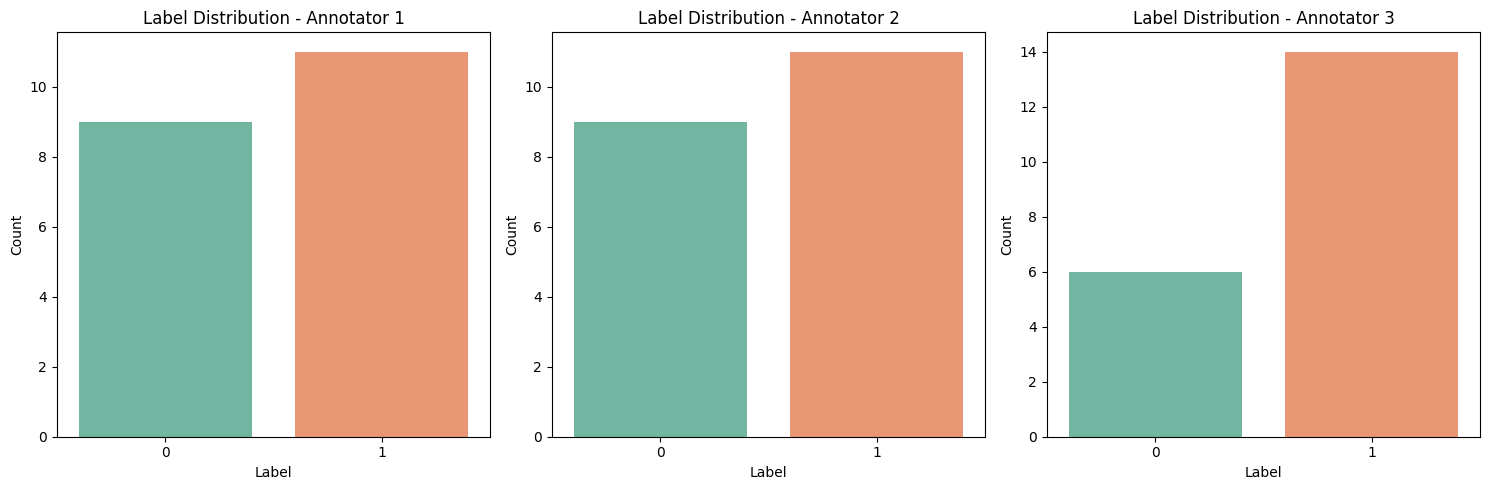

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distributions for each annotator
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Annotator 1
sns.countplot(x='label_annotator_1', data=labeled_data, ax=ax[0], palette="Set2")
ax[0].set_title('Label Distribution - Annotator 1')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Count')

# Annotator 2
sns.countplot(x='label_annotator_2', data=labeled_data, ax=ax[1], palette="Set2")
ax[1].set_title('Label Distribution - Annotator 2')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Count')

# Annotator 3
sns.countplot(x='label_annotator_3', data=labeled_data, ax=ax[2], palette="Set2")
ax[2].set_title('Label Distribution - Annotator 3')
ax[2].set_xlabel('Label')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


<ipython-input-33-5bd25f9a1ae6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_label', data=labeled_data, palette="Set1")


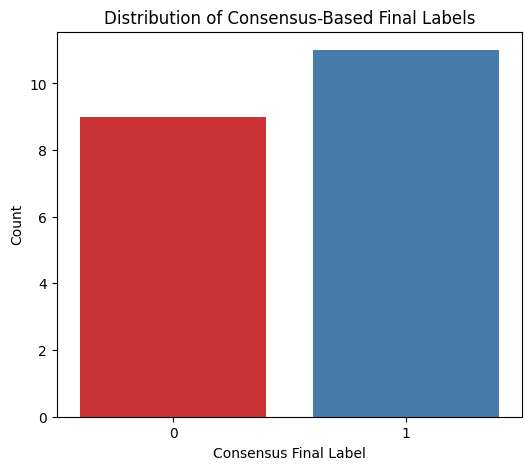

In [ ]:
# Plot the distribution of final (consensus) labels
plt.figure(figsize=(6, 5))
sns.countplot(x='final_label', data=labeled_data, palette="Set1")
plt.title('Distribution of Consensus-Based Final Labels')
plt.xlabel('Consensus Final Label')
plt.ylabel('Count')
plt.show()


### **C. Fairness constraints in model training**
This setup is an example of implementing Fairness Constraints in Model Training, showing how to train a model while controlling for fairness across demographic groups. The code demonstrates both the process of applying a fairness penalty and monitoring its impact on training.

**Step 1: Importing Required Libraries**

Purpose: Importing Matplotlib to plot the training results (loss and fairness penalty). Matplotlib is used to create graphs, which helps visualize how the model's performance and fairness change during training.

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

 **Step 2: Create Synthetic Data with Demographic Groups**
Here, we generate synthetic data with make_classification, creating 1000 samples with 20 features. The target variable (y) is balanced, and we create a random demographic group assignment (groups) with values 0 or 1. These groups represent demographic categories (e.g., gender), allowing us to analyze and apply fairness constraints.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.5, 0.5], random_state=42)
groups = np.random.randint(0, 2, size=y.shape)  # Random demographic group assignment


**Step 3: Train-Test Split and Data Normalization**

We split the dataset into training and test sets. Standard scaling normalizes the feature data, improving the model's performance by ensuring that features contribute equally during training.

In [ ]:
X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(X, y, groups, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 4: TConvert Data to PyTorch Tensors**
To use PyTorch for training, we convert the training features (X_train), labels (y_train), and demographic groups (groups_train) into PyTorch tensors, which are required for model training.

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
groups_train_tensor = torch.tensor(groups_train, dtype=torch.float32)


**Step 5: Define the FairNet Model**

FairNet is a simple neural network with one hidden layer. We use ReLU as the activation function for the hidden layer and sigmoid for the output layer to perform binary classification.



In [ ]:
class FairNet(nn.Module):
    def __init__(self):
        super(FairNet, self).__init__()
        self.fc1 = nn.Linear(20, 10)  # Hidden layer (20 input features -> 10 units)
        self.fc2 = nn.Linear(10, 1)   # Output layer (10 units -> 1 output)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU to hidden layer
        x = torch.sigmoid(self.fc2(x))  # Apply sigmoid for binary classification
        return x


**Step 6: Define the Fairness Penalty Function (Demographic Parity)**

This function calculates a fairness penalty based on demographic parity. It measures the difference in positive prediction rates between groups (0 and 1). We take the absolute difference between the mean predictions of each group. The penalty encourages the model to make similar predictions for both groups, aiming to reduce disparity.

In [ ]:
def fairness_penalty(preds, labels, groups):
    group_0_idx = (groups == 0)
    group_1_idx = (groups == 1)

    group_0_mean = preds[group_0_idx].mean()
    group_1_mean = preds[group_1_idx].mean()

    penalty = torch.abs(group_0_mean - group_1_mean)
    return penalty


**Step 7: Initialize Model, Criterion, Optimizer, and Fairness Weight**

We initialize the FairNet model, set binary cross-entropy loss as our criterion for accuracy, and use the Adam optimizer for training. lambda_fairness is the weight that controls the impact of the fairness penalty on the overall loss.

In [ ]:
model = FairNet()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)
lambda_fairness = 0.1  # Fairness weight (penalty adjustment)


**Step 8: Train the Model with Fairness Constraints**

In this loop, we train the model for 50 epochs. We calculate the main_loss to measure the model’s prediction accuracy. We then compute the fairness penalty using the fairness_penalty function and combine it with main_loss using lambda_fairness as a scaling factor. This combined loss (loss) balances the model’s accuracy with fairness constraints. We track the main loss and fairness penalty values for each epoch for later visualization.

In [ ]:
for epoch in range(50):  # Training loop for 50 epochs
    model.train()
    optimizer.zero_grad()  # Reset gradients

    outputs = model(X_train_tensor).squeeze()  # Predictions
    main_loss = criterion(outputs, y_train_tensor)  # Main loss for accuracy

    penalty = fairness_penalty(outputs, y_train_tensor, groups_train_tensor)
    loss = main_loss + lambda_fairness * penalty  # Combined loss

    main_loss_values.append(main_loss.item())
    fairness_penalty_values.append(penalty.item())

    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}, Fairness Penalty: {penalty.item():.4f}")


Epoch [10/50], Loss: 0.5868, Fairness Penalty: 0.0000
Epoch [20/50], Loss: 0.4572, Fairness Penalty: 0.0001
Epoch [30/50], Loss: 0.3451, Fairness Penalty: 0.0000
Epoch [40/50], Loss: 0.2929, Fairness Penalty: 0.0002
Epoch [50/50], Loss: 0.2696, Fairness Penalty: 0.0004


**Step 9: Plot the Main Loss and Fairness Penalty**

We plot two graphs:

Main Loss (proxy for accuracy) - Shows how the model’s accuracy changes over epochs.
Fairness Penalty - Indicates the model’s progress in reducing prediction disparities across groups.
These graphs help visualize the trade-off between accuracy and fairness as the training progresses. By adjusting lambda_fairness, we can control this balance, emphasizing fairness to the desired degree.



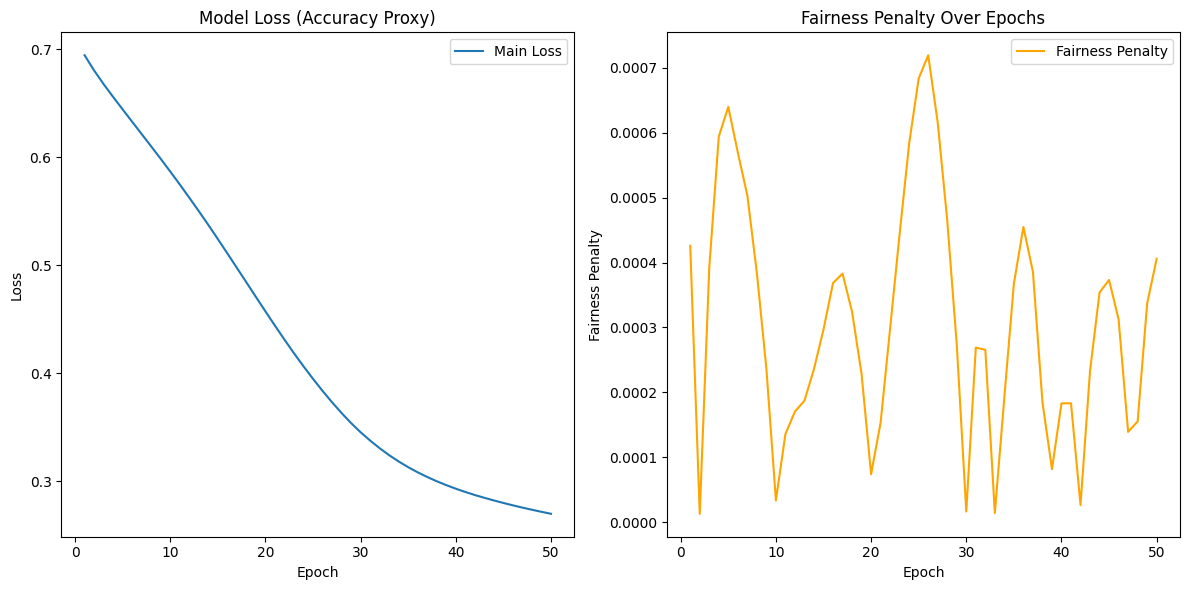

In [ ]:
epochs = list(range(1, 51))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, main_loss_values, label="Main Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss (Accuracy Proxy)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, fairness_penalty_values, label="Fairness Penalty", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Fairness Penalty")
plt.title("Fairness Penalty Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


### **D.Adversarial Debiasing**

**Step 1: Import Librarie**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


**Step 2: Create Synthetic Data with Multiple Sensitive Attributes**

Here, synthetic data is generated with 2000 samples and three types of variables:

Two features (feature_1 and feature_2) represent input data.
Two sensitive attributes (age_group and gender), which we want to ensure do not influence predictions unfairly.
Target label (label) representing the binary class the main model will try to predict.
This setup provides the base data to evaluate and mitigate bias in predictions based on age_group and gender.

In [ ]:
np.random.seed(42)
n_samples = 2000

data = {
    'feature_1': np.random.normal(0, 1, n_samples),
    'feature_2': np.random.normal(1, 1.5, n_samples),
    'age_group': np.random.choice([0, 1], n_samples),  # Sensitive attribute: 0 = Younger, 1 = Older
    'gender': np.random.choice([0, 1], n_samples),     # Sensitive attribute: 0 = Female, 1 = Male
    'label': np.random.choice([0, 1], n_samples)
}
df = pd.DataFrame(data)


**Step 3: Train-Test Split and Conversion to Tensors**

Here, the dataset is split into training and test sets with 80/20 distribution. The features, labels, and sensitive attributes are then converted to PyTorch tensors for model compatibility. This setup enables the main model and adversaries to be trained on structured data, allowing us to include debiasing techniques.

In [ ]:
X = df[['feature_1', 'feature_2']]
y = df['label']
sensitive_attributes = df[['age_group', 'gender']]

X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(
    X, y, sensitive_attributes, test_size=0.2, stratify=y, random_state=42
)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
age_train_tensor = torch.tensor(sensitive_train['age_group'].values, dtype=torch.float32)
gender_train_tensor = torch.tensor(sensitive_train['gender'].values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


**Step 4: Define the Main Model and Two Adversaries**

MainModel: This model predicts the target label from two features using a three-layer neural network.
AdversaryModel: Two adversary models are created to predict the sensitive attributes (age_group and gender) based on the outputs from the main model. The adversaries help detect and mitigate bias in the main model’s predictions by penalizing it if it produces patterns associated with sensitive attributes.

In [ ]:
class MainModel(nn.Module):
    def __init__(self):
        super(MainModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)

class AdversaryModel(nn.Module):
    def __init__(self):
        super(AdversaryModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)


**Step 5: Instantiate Models and Set Loss Functions and Optimizers**

Here:

main_model, age_adversary, and gender_adversary are initialized.
criterion_main is the main loss function for binary classification.
criterion_adversary is used to measure the adversaries’ prediction accuracy.
optimizer_main, optimizer_age, and optimizer_gender update the models’ weights.
lambda_fairness determines the extent to which the fairness penalty affects the main model’s loss.

In [ ]:
main_model = MainModel()
age_adversary = AdversaryModel()
gender_adversary = AdversaryModel()

criterion_main = nn.BCELoss()
criterion_adversary = nn.BCELoss()
optimizer_main = optim.Adam(main_model.parameters(), lr=0.01)
optimizer_age = optim.Adam(age_adversary.parameters(), lr=0.01)
optimizer_gender = optim.Adam(gender_adversary.parameters(), lr=0.01)
lambda_fairness = 0.1  # Fairness penalty weight


**Step 6: Adversarial Training Loop**

In this loop, we train the main model and the two adversaries for 50 epochs:

Main Model: Computes predictions for y_train_tensor and calculates main_loss.
Adversaries: Each adversary (age and gender) tries to predict their respective sensitive attribute from the main model’s output. The adversarial losses (age_adversary_loss and gender_adversary_loss) indicate how well the adversaries can infer sensitive attributes from these outputs.
Fairness Penalty: The adversarial losses are used to create a fairness penalty, discouraging the main model from learning patterns tied to age_group and gender. By penalizing the main model for adversaries’ success, it learns representations that are less biased toward the sensitive attributes.

In [ ]:
n_epochs = 50
for epoch in range(n_epochs):
    main_model.train()
    optimizer_main.zero_grad()
    main_outputs = main_model(X_train_tensor).squeeze()
    main_loss = criterion_main(main_outputs, y_train_tensor)

    # Age Adversary Training
    age_adversary.train()
    optimizer_age.zero_grad()
    age_adversary_outputs = age_adversary(main_outputs.detach().unsqueeze(1)).squeeze()
    age_adversary_loss = criterion_adversary(age_adversary_outputs, age_train_tensor)

    # Gender Adversary Training
    gender_adversary.train()
    optimizer_gender.zero_grad()
    gender_adversary_outputs = gender_adversary(main_outputs.detach().unsqueeze(1)).squeeze()
    gender_adversary_loss = criterion_adversary(gender_adversary_outputs, gender_train_tensor)

    # Penalize Main Model for Adversaries’ Success
    total_loss = main_loss + lambda_fairness * (age_adversary_loss + gender_adversary_loss)
    total_loss.backward()
    optimizer_main.step()
    optimizer_age.step()
    optimizer_gender.step()


**Step 7: Baseline Model Training (Without Debiasing)**

For comparison, we train a baseline model without any adversarial debiasing. This model learns based solely on prediction accuracy, so it may capture patterns tied to sensitive attributes. This step provides a benchmark to see if debiasing affects the main model’s accuracy.

In [ ]:
baseline_model = MainModel()
baseline_optimizer = optim.Adam(baseline_model.parameters(), lr=0.01)
for epoch in range(n_epochs):
    baseline_optimizer.zero_grad()
    baseline_outputs = baseline_model(X_train_tensor).squeeze()
    baseline_loss = criterion_main(baseline_outputs, y_train_tensor)
    baseline_loss.backward()
    baseline_optimizer.step()


**Step 8: Evaluate Models**

We evaluate both the baseline and debiased models on the test set and generate a classification report. This shows the accuracy, precision, recall, and F1-score, allowing us to compare the impact of adversarial debiasing on prediction performance.



In [ ]:
with torch.no_grad():
    y_pred_baseline = (baseline_model(X_test_tensor).squeeze() > 0.5).float().numpy()
    y_pred_debiased = (main_model(X_test_tensor).squeeze() > 0.5).float().numpy()

print("Baseline Model (Before Debiasing) Report:")
print(classification_report(y_test, y_pred_baseline))

print("Debiased Model (After Adversarial Training) Report:")
print(classification_report(y_test, y_pred_debiased))


Baseline Model (Before Debiasing) Report:
              precision    recall  f1-score   support

           0       0.54      0.92      0.68       212
           1       0.53      0.10      0.16       188

    accuracy                           0.54       400
   macro avg       0.53      0.51      0.42       400
weighted avg       0.53      0.54      0.44       400

Debiased Model (After Adversarial Training) Report:
              precision    recall  f1-score   support

           0       0.53      0.98      0.69       212
           1       0.50      0.03      0.05       188

    accuracy                           0.53       400
   macro avg       0.52      0.50      0.37       400
weighted avg       0.52      0.53      0.39       400



### **Threshold adjustment for subgroups**

This code is an implementation of a fairness technique called "threshold adjustment" applied to a synthetic dataset. In this case, we have a dataset divided into two groups, "A" and "B," and the goal is to evaluate the fairness of a machine learning model's predictions for these subgroups by adjusting prediction thresholds. Here's a breakdown of the code in parts:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Step 2: Synthetic Data Creation**

Purpose: This section creates a synthetic dataset with two features (feature_1 and feature_2), a binary attribute group (representing groups A and B), and a binary target label.
Context: The group variable is treated as a sensitive attribute, meaning we aim to treat groups A and B equitably in model predictions.

In [ ]:
np.random.seed(0)
n_samples = 1000
data = {
    'feature_1': np.random.rand(n_samples),
    'feature_2': np.random.rand(n_samples),
    'group': np.random.choice(['A', 'B'], n_samples),  # Two groups
    'label': np.random.choice([0, 1], n_samples)  # Binary labels
}
df = pd.DataFrame(data)


**Step 3: Train-Test Split with Stratification by Group**

Purpose: This splits the dataset into training and testing sets while ensuring each group has a balanced representation in both sets. Stratifying by group helps maintain group representation across splits.
Context: Balanced groups in train-test splits are essential to check if the model performs equitably across sensitive subgroups.


In [ ]:
X = df[['feature_1', 'feature_2']]
y = df['label']
groups = df['group']

X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(
    X, y, groups, test_size=0.2, stratify=groups, random_state=42
)

**Step 4: Initial Model Training with Cross-Validation**

Purpose: Here, a RandomForestClassifier model is trained with 5-fold cross-validation, and predictions are generated on the training set.
Context: The initial model serves as a baseline for fairness evaluation, so we can later compare it with a debiased model after applying threshold adjustments.

In [ ]:
model_initial = RandomForestClassifier(random_state=42)
y_pred_initial = cross_val_predict(model_initial, X_train, y_train, cv=5)


**Step 5: Initial Model Evaluation**

Purpose: We use classification_report to generate precision, recall, and F1 scores, which are useful metrics to evaluate model performance per class. accuracy_score provides an overall accuracy of the model.
Context: This initial evaluation captures metrics that show whether the model performance is consistent across subgroups A and B, providing baseline values before adjustments.

In [ ]:
initial_report = classification_report(y_train, y_pred_initial, output_dict=True)
accuracy_initial = accuracy_score(y_test, model_initial.fit(X_train, y_train).predict(X_test))


**Step 6: Fairness Technique - Threshold Adjustment**

 Purpose: Here, we apply threshold adjustment by setting different prediction thresholds for each group. Group A receives a lower threshold (0.4) compared to group B (0.6), meaning that it's easier for members of group A to be predicted as positive.
Context: This technique is used to improve fairness. By adjusting thresholds, we address potential biases where one group might be treated less favorably in the model predictions.

In [ ]:
threshold_A = 0.4  # Lower threshold for group A
threshold_B = 0.6  # Higher threshold for group B

y_probs = model_initial.predict_proba(X_test)[:, 1]
y_pred_adjusted = np.where(groups_test == 'A', (y_probs >= threshold_A).astype(int),
                                             (y_probs >= threshold_B).astype(int))


**Step 7: Adjusted Model Evaluation**

Purpose: This generates a classification report after applying threshold adjustments, allowing us to evaluate whether fairness across groups has improved.
Context: The adjusted metrics help us understand if threshold adjustments lead to more balanced outcomes in precision, recall, and F1 scores across groups A and B.



In [ ]:
adjusted_report = classification_report(y_test, y_pred_adjusted, output_dict=True)


**Step 8: Visualization of Metrics Comparison**

Purpose: This visualization shows a side-by-side comparison of model metrics before and after threshold adjustment.
Context: Visualizing the metrics allows for an easier comparison of whether fairness techniques have had the desired impact on performance across sensitive subgroups.

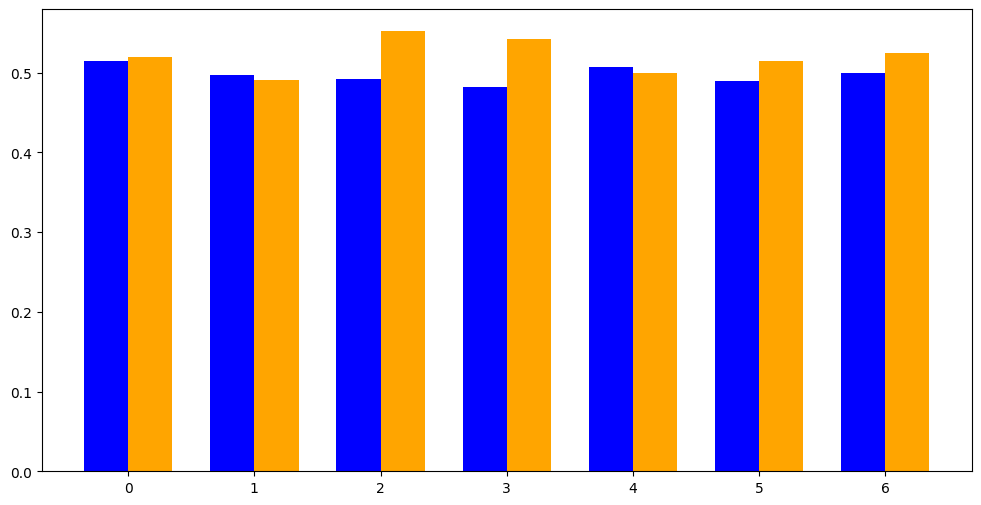

In [ ]:
metrics_initial = {
    'Accuracy': accuracy_initial,
    'Precision Group A': initial_report['0']['precision'],
    'Precision Group B': initial_report['1']['precision'],
    'Recall Group A': initial_report['0']['recall'],
    'Recall Group B': initial_report['1']['recall'],
    'F1 Score Group A': initial_report['0']['f1-score'],
    'F1 Score Group B': initial_report['1']['f1-score']
}

# Store metrics
metrics_adjusted = {
    'Accuracy': accuracy_score(y_test, y_pred_adjusted),
    'Precision Group A': adjusted_report['0']['precision'],
    'Precision Group B': adjusted_report['1']['precision'],
    'Recall Group A': adjusted_report['0']['recall'],
    'Recall Group B': adjusted_report['1']['recall'],
    'F1 Score Group A': adjusted_report['0']['f1-score'],
    'F1 Score Group B': adjusted_report['1']['f1-score']
}
labels = list(metrics_initial.keys())
initial_values = list(metrics_initial.values())
adjusted_values = list(metrics_adjusted.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, initial_values, width, label='Initial Model', color='blue')
bars2 = ax.bar(x + width/2, adjusted_values, width, label='Adjusted Model', color='orange')


### **F. Continuous model training**

The code demonstrates a continuous training approach where a model is initially trained on a dataset and then updated over time as new data arrives. This approach is beneficial in scenarios where the data distribution may change or new data is available periodically

**1. Import Libraries and Set Random Seed**

This section imports necessary libraries for data manipulation, visualization, and modeling. Setting the random seed ensures reproducible results, as it fixes the randomness in data splitting and model training.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)


**2. Create the Initial Dataset**

A synthetic dataset with 500 samples is created with two random features (feature_1 and feature_2) and a binary label (label). This dataset simulates the initial data available for model training.

In [ ]:
# 1. Create synthetic initial dataset
n_initial_samples = 500
initial_data = {
    'feature_1': np.random.rand(n_initial_samples),
    'feature_2': np.random.rand(n_initial_samples),
    'label': np.random.choice([0, 1], n_initial_samples)
}
initial_df = pd.DataFrame(initial_data)


**3. Split and Train the Initial Model**

The dataset is split into training and testing sets (80% training, 20% testing). A Random Forest model (model_initial) is then trained on this initial training set. The model's performance is evaluated on the test set using accuracy and classification metrics, with results stored in initial_report and accuracy_initial.

In [ ]:
# Split the initial dataset into training and test sets
X_initial = initial_df[['feature_1', 'feature_2']]
y_initial = initial_df['label']
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X_initial, y_initial, test_size=0.2, random_state=42)

# 2. Train the initial model
model_initial = RandomForestClassifier(random_state=42)
model_initial.fit(X_train_initial, y_train_initial)

# Evaluate initial model performance
y_pred_initial = model_initial.predict(X_test)
initial_report = classification_report(y_test, y_pred_initial, output_dict=True)
accuracy_initial = accuracy_score(y_test, y_pred_initial)


**4. Simulate New Data Arriving Over Time**

A function generate_new_data is defined to create new batches of data. This function is called five times (simulating five separate time periods), each time generating 200 samples. The results are concatenated into new_data_combined, representing the new data that becomes available over time.



In [ ]:
# 3. Introduce new diverse data
def generate_new_data(n_samples):
    return pd.DataFrame({
        'feature_1': np.random.rand(n_samples),
        'feature_2': np.random.rand(n_samples),
        'label': np.random.choice([0, 1], n_samples)
    })

# Simulate new data arriving over time
new_data_periods = [generate_new_data(200) for _ in range(5)]  # 5 periods of new data
new_data_combined = pd.concat(new_data_periods, ignore_index=True)


**5. Continuously Retrain the Model with Combined Data**

Here, the original and new datasets are combined into X_combined and y_combined. This expanded dataset is split into new training and test sets, and the model (model_updated) is retrained on this combined data. Performance is evaluated on the updated test set, and results are stored in updated_report and accuracy_updated.



In [ ]:
# 4. Continuously retrain the model
X_new = new_data_combined[['feature_1', 'feature_2']]
y_new = new_data_combined['label']

# Combine old and new data for retraining
X_combined = pd.concat([X_initial, X_new], ignore_index=True)
y_combined = pd.concat([y_initial, y_new], ignore_index=True)

# Split the combined dataset into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Train the updated model
model_updated = RandomForestClassifier(random_state=42)
model_updated.fit(X_train_combined, y_train_combined)

# Evaluate updated model performance
y_pred_updated = model_updated.predict(X_test_combined)
updated_report = classification_report(y_test_combined, y_pred_updated, output_dict=True)
accuracy_updated = accuracy_score(y_test_combined, y_pred_updated)


**6. Visualize Results and Compare Performance**

This code segment visualizes and compares the performance metrics (accuracy, precision, recall, and F1 score) of the initial and updated models. A bar plot is created to provide a clear comparison of these metrics before and after retraining.

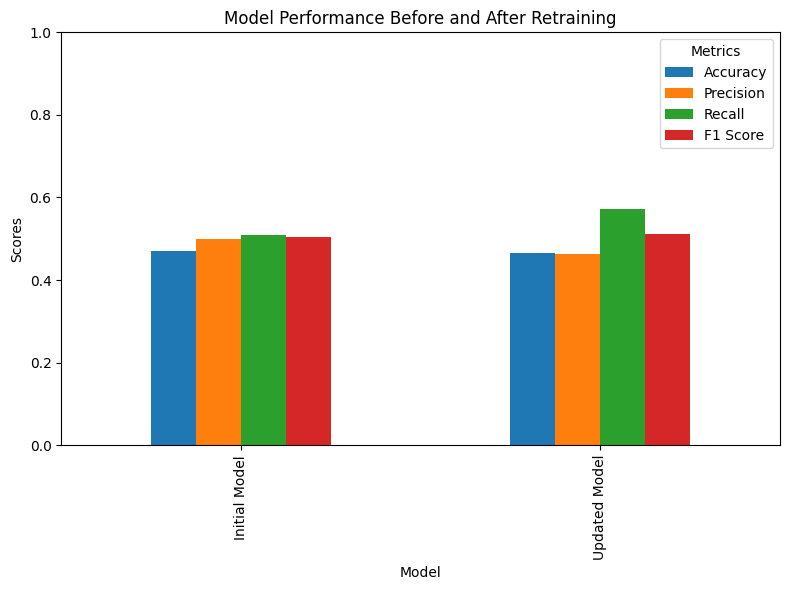

In [ ]:
# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': labels,
    'Accuracy': accuracies,
    'Precision': precision_A,
    'Recall': recall_A,
    'F1 Score': f1_A
})

# Plotting a single bar plot for accuracy, precision, recall, F1 score
fig, ax = plt.subplots(figsize=(8, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=ax)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Retraining')
ax.legend(title='Metrics')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()
